In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.linalg import inv
import scipy.stats
import time
import math
from datetime import datetime
import socket
from configuration import * 
from Environment import BipedalWalkerEnvironment
from sklearn import preprocessing

In [2]:
checkpoint = np.load('25/checkpoint.npy')
M = checkpoint[0]
W = checkpoint[1]
tau = checkpoint[2]
alpha = checkpoint[3]
reward_sum = checkpoint[4]


[[array([[  0.55283799,   3.75165348,   3.24196098,  -0.8435608 ],
       [  2.79078964,  -2.69880113, -10.99948717,   2.18352251]])]
 [array([[ 2.08538679,  4.48634506,  9.4718004 ,  6.05269259],
       [ 1.40693687,  3.2799733 , 10.42880028, -1.1602723 ]])]]


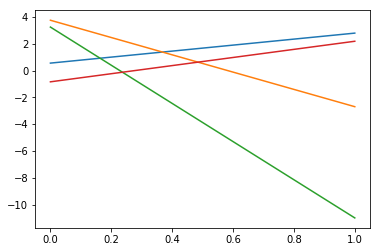

In [3]:
print(M)
M.shape
plt.plot(M[0][0])

In [4]:
W

array([[array([[ 3.73284499e+02,  7.65072474e+01,  9.76857927e-04,
         2.30827736e-02, -1.60004488e+02, -5.39062727e+00],
       [-1.14796665e+03, -2.44093691e+02, -2.31544890e-03,
        -2.88798531e-02,  5.69506081e+02,  1.68806104e+01]])],
       [array([[-17.69206522,   4.7901442 ,   0.10079379,  25.76289686,
         -0.21964001,  -0.03128958],
       [  7.60188824,  -3.98953042,  -0.06699281,  -7.56317587,
          0.20921822,   0.08350835]])]], dtype=object)

In [5]:
tau

array([[0.6653801852096991],
       [0.6655198547786584]], dtype=object)

In [6]:
alpha

array([[array([[6.174861465602123e-06],
       [0.00013684999023873737],
       [1.1013474489321609],
       [1.0843385754903996],
       [2.5713796279385188e-05],
       [0.003422266139027574]], dtype=object)],
       [array([[0.02383753660689159],
       [0.16574213730784],
       [1.1399668607806073],
       [0.012224986423953732],
       [1.1805180491378922],
       [1.0110746757738331]], dtype=object)]], dtype=object)

In [7]:
reward_sum

3.067202158219556

In [8]:
checkpoint = np.load('60/checkpoint.npy')
M = checkpoint[0]
W = checkpoint[1]
tau = checkpoint[2]
alpha = checkpoint[3]
reward_sum = checkpoint[4]


[[array([[ -93.24855334, -161.53901662,   22.23436275,  177.03552424],
       [ -32.07736148,  -54.75380243,    7.71455982,   49.21071773]])]
 [array([[  65.96848065,  122.14449849,   14.25154398,  -82.74798985],
       [ -81.90735269, -146.35629412,   18.79490878,  144.44642132]])]]


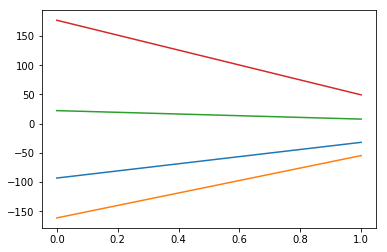

In [9]:
print(M)
plt.plot(M[0][0])

In [10]:
W

array([[array([[-0.02166052, -0.01839673, -0.01618066,  0.001754  , -0.02557867,
         0.00512535],
       [ 0.00603436,  0.00230146,  0.08228419,  0.01944941,  0.00820057,
         0.01720871]])],
       [array([[-0.00765158,  0.00898711, -0.01237372, -0.01647153, -0.01377583,
         0.03695842],
       [-0.02180779, -0.01800087,  0.11247732,  0.04442818, -0.00996371,
        -0.00426579]])]], dtype=object)

In [11]:
tau

array([[0.6662331928768264],
       [0.6662652818854146]], dtype=object)

In [12]:
alpha

array([[array([[1.2654174318190246],
       [1.2675971904956704],
       [1.271666307881902],
       [1.2685755461856056],
       [1.2633583994655877],
       [1.2706960059637704]], dtype=object)],
       [array([[1.2652989160319323],
       [1.2676757129531482],
       [1.2692735569409337],
       [1.2678550152057708],
       [1.2635149781309984],
       [1.2701571184824008]], dtype=object)]], dtype=object)

In [13]:
reward_sum

-9.58381240897828

Notes: 
iteration 25 looks really good
investigate that one next

After about ~ 70 iterations values converge to awful results without progress

In [14]:


best_size=10
sample_size=20
number_of_groups=2
#two degrees of freedom per group, knee and
#dimensions_per_group=np.array([7,7]) 
dimensions_per_group=np.array([2,2])
latent_dimension_size=6
orginial_feature_dimension_size=4
Time=5
max_iterations=300
max_inner_iterations=20
#don't touch 
sigma2_M=100
anti_convergence_factor=1.5
tauA=1000
tauB=1000
alphaA=1
alphaB=1
initial_Tau= inv(np.array([10]).reshape(1,-1)**1.5)[0][0]
initial_Alpha=1

In [15]:
# Exploration of basis function
#initalization
W=np.empty([number_of_groups,1],dtype=object)
tau = np.empty([number_of_groups,1],dtype=object)
alpha=np.empty([number_of_groups,1],dtype=object)
initialM = np.empty([number_of_groups,1],dtype=object)

for m in range(0,number_of_groups):
    W[m][0] = np.random.randn(dimensions_per_group[m],latent_dimension_size)
    tau[m][0]=initial_Tau
    alpha[m]=initial_Alpha


for m in range(0,number_of_groups):
    initialM[m][0]=np.zeros([dimensions_per_group[m],orginial_feature_dimension_size])

M = np.copy(initialM)

In [16]:
DoF=sum(dimensions_per_group)
number_of_groups=dimensions_per_group.shape[0]    

means = np.arange(-3,Time+3,3)
BasisDim = len(means)
variance = 3
bafu = scipy.stats.norm.pdf(1,means,variance)
bafu = bafu.reshape(-1,1)

In [17]:
print(means)
print(bafu)
print(len(means))

[-3  0  3  6]
[[0.05467002]
 [0.12579441]
 [0.10648267]
 [0.03315905]]
4


In [18]:
for i in range(1,Time):
    function_i = scipy.stats.norm.pdf(i+1,means,variance)
    function_i = function_i.reshape(-1,1)
    bafu = np.concatenate((bafu,function_i),1)
print(bafu)

[[0.05467002 0.03315905 0.01799699 0.00874063 0.00379866]
 [0.12579441 0.10648267 0.08065691 0.05467002 0.03315905]
 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
 [0.03315905 0.05467002 0.08065691 0.10648267 0.12579441]]


In [19]:
sum_bafu = np.sum(bafu,0)
sum_bafu = sum_bafu.reshape(1,-1)
sum_bafu = np.repeat(sum_bafu,len(means),0)
Basisfunctions = np.divide(bafu,sum_bafu)

In [20]:
print(Basisfunctions)
print(Basisfunctions.shape)

[[0.17078718 0.10358766 0.0576288  0.02956034 0.01410911]
 [0.39297717 0.33264799 0.25827437 0.18489108 0.12316033]
 [0.33264799 0.39297717 0.42582245 0.42542992 0.39550115]
 [0.10358766 0.17078718 0.25827437 0.36011866 0.46722941]]
(4, 5)


In [21]:
for t in np.arange(0,Time).reshape(-1):
    print(Basisfunctions[:,t])

[0.17078718 0.39297717 0.33264799 0.10358766]
[0.10358766 0.33264799 0.39297717 0.17078718]
[0.0576288  0.25827437 0.42582245 0.25827437]
[0.02956034 0.18489108 0.42542992 0.36011866]
[0.01410911 0.12316033 0.39550115 0.46722941]


In [22]:
%%latex
\begin{align}
sin(\frac{t}T \times 720 + \frac{j-1}J \times 360)
\end{align}

<IPython.core.display.Latex object>

In [23]:
steps = np.linspace(1,20,20,dtype=np.int_)
pi = np.pi
J = 10
T = 20
j = 2
bafu = np.sin( (1/T)*(4.05*pi) + ((j-1)/J) * (2*pi) )
bafu = bafu.reshape(-1,1)
print(bafu)
print(steps)


#plt.plot(steps,function_i)

[[0.95345417]]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [24]:
fig = plt.figure()

result = []
result_arr = np.zeros((11,20))

for j in range(1,J+1):
    for t in range(1,T+1):
        function_i = np.sin( (t/T)*(4.05*pi) + ((j-1)/J) * (2*pi) )
        result.append(function_i)
        #print(result)
    # result_np = np.asarray(result).reshape(1,-1) unused
    #print(result_np.shape)
    result_arr[j,:] = result
    result = []
#print(result_arr[1,:])
#print(result_arr[1])
#print(result_arr.shape)
from basis_model import *
print(result_arr[0])
result2 = PeriodicBasisModel().get_basis_functions(T,J)
result_arr = result_arr[1:]
result_arr = result_arr.reshape(J,T)
print(result_arr[0])
result_arr.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.59412106  0.95579301  0.94351216  0.56208338 -0.03925982 -0.62524266
 -0.9666001  -0.92977649 -0.529179    0.0784591   0.65540017  0.97591676
  0.91460716  0.49545867 -0.1175374  -0.68454711 -0.98372863 -0.89802758
 -0.46097437  0.15643447]


(10, 20)

<Figure size 432x288 with 0 Axes>

(20,)


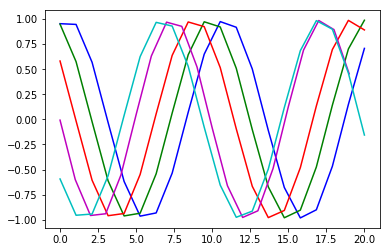

In [25]:
# x = np.arange(0,5,0.1)
# y = np.sin(x)
# print(y)
# plt.plot(x,y)
print(result_arr[1].shape)
t = np.linspace(0.,20.,20)
plt.plot(t, result_arr[1],'b-' , t,result_arr[2], 'g-', t, result_arr[3], 'r-',result_arr[4],'m-',t,result_arr[5],'c-')

In [26]:
plt.plot(t, result_arr[6],'b-' , t,result_arr[7], 'g-', t, result_arr[8], 'r-',result_arr[9],'m-',t,result_arr[10],'c-')

IndexError: index 10 is out of bounds for axis 0 with size 10